In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("superstore.csv")

In [5]:
data.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [6]:
data.dtypes

Category           object
City               object
Country            object
Customer.ID        object
Customer.Name      object
Discount          float64
Market             object
记录数                 int64
Order.Date         object
Order.ID           object
Order.Priority     object
Product.ID         object
Product.Name       object
Profit            float64
Quantity            int64
Region             object
Row.ID              int64
Sales               int64
Segment            object
Ship.Date          object
Ship.Mode          object
Shipping.Cost     float64
State              object
Sub.Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object

In [8]:
data.isna().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [13]:
data.duplicated(subset=["Order.ID","Product.ID"]).sum()

38

In [14]:
duplicates = data[data.duplicated(subset=["Order.ID","Product.ID"], keep=False)]
duplicates.sort_values(["Order.ID","Product.ID"])


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
22751,Technology,Oran,Algeria,CD-27901,Cynthia Delaney,0.0,Africa,1,2014-08-20 00:00:00.000,AG-2014-4840,...,57,Home Office,2014-08-25 00:00:00.000,Standard Class,5.43,Oran,Accessories,2014,Africa,34
22752,Technology,Oran,Algeria,CD-27901,Cynthia Delaney,0.0,Africa,1,2014-08-20 00:00:00.000,AG-2014-4840,...,57,Home Office,2014-08-25 00:00:00.000,Standard Class,2.77,Oran,Accessories,2014,Africa,34
2267,Office Supplies,Louisville,United States,SS-205154,Shirley Schmidt,0.0,US,1,2012-07-24 00:00:00.000,CA-2012-103135,...,135,Home Office,2012-07-28 00:00:00.000,Standard Class,9.60,Kentucky,Binders,2012,North America,30
2268,Office Supplies,Louisville,United States,SS-205154,Shirley Schmidt,0.0,US,1,2012-07-24 00:00:00.000,CA-2012-103135,...,90,Home Office,2012-07-28 00:00:00.000,Standard Class,12.98,Kentucky,Binders,2012,North America,30
1367,Office Supplies,New York City,United States,AB-100604,Adam Bellavance,0.0,US,1,2013-09-02 00:00:00.000,CA-2013-129714,...,25,Home Office,2013-09-04 00:00:00.000,First Class,6.53,New York,Paper,2013,North America,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46972,Furniture,Columbus,United States,LB-167954,Laurel Beltran,0.3,US,1,2011-04-23 00:00:00.000,US-2011-150119,...,281,Home Office,2011-04-27 00:00:00.000,Standard Class,3.46,Ohio,Chairs,2011,North America,17
47898,Technology,Gastonia,United States,RB-197954,Ross Baird,0.2,US,1,2013-04-16 00:00:00.000,US-2013-123750,...,409,Home Office,2013-04-22 00:00:00.000,Standard Class,67.33,North Carolina,Accessories,2013,North America,16
47899,Technology,Gastonia,United States,RB-197954,Ross Baird,0.2,US,1,2013-04-16 00:00:00.000,US-2013-123750,...,292,Home Office,2013-04-22 00:00:00.000,Standard Class,52.10,North Carolina,Accessories,2013,North America,16
9350,Office Supplies,Andijon,Uzbekistan,VD-116702,Valerie Dominguez,0.0,EMEA,1,2014-02-17 00:00:00.000,UZ-2014-7970,...,32,Consumer,2014-02-21 00:00:00.000,Second Class,6.05,Andijan,Binders,2014,EMEA,8


In [15]:
suspicious = data[data.duplicated(subset=["Order.ID","Product.ID"], keep=False)]

suspicious.sort_values(["Order.ID","Product.ID"])


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
22751,Technology,Oran,Algeria,CD-27901,Cynthia Delaney,0.0,Africa,1,2014-08-20 00:00:00.000,AG-2014-4840,...,57,Home Office,2014-08-25 00:00:00.000,Standard Class,5.43,Oran,Accessories,2014,Africa,34
22752,Technology,Oran,Algeria,CD-27901,Cynthia Delaney,0.0,Africa,1,2014-08-20 00:00:00.000,AG-2014-4840,...,57,Home Office,2014-08-25 00:00:00.000,Standard Class,2.77,Oran,Accessories,2014,Africa,34
2267,Office Supplies,Louisville,United States,SS-205154,Shirley Schmidt,0.0,US,1,2012-07-24 00:00:00.000,CA-2012-103135,...,135,Home Office,2012-07-28 00:00:00.000,Standard Class,9.60,Kentucky,Binders,2012,North America,30
2268,Office Supplies,Louisville,United States,SS-205154,Shirley Schmidt,0.0,US,1,2012-07-24 00:00:00.000,CA-2012-103135,...,90,Home Office,2012-07-28 00:00:00.000,Standard Class,12.98,Kentucky,Binders,2012,North America,30
1367,Office Supplies,New York City,United States,AB-100604,Adam Bellavance,0.0,US,1,2013-09-02 00:00:00.000,CA-2013-129714,...,25,Home Office,2013-09-04 00:00:00.000,First Class,6.53,New York,Paper,2013,North America,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46972,Furniture,Columbus,United States,LB-167954,Laurel Beltran,0.3,US,1,2011-04-23 00:00:00.000,US-2011-150119,...,281,Home Office,2011-04-27 00:00:00.000,Standard Class,3.46,Ohio,Chairs,2011,North America,17
47898,Technology,Gastonia,United States,RB-197954,Ross Baird,0.2,US,1,2013-04-16 00:00:00.000,US-2013-123750,...,409,Home Office,2013-04-22 00:00:00.000,Standard Class,67.33,North Carolina,Accessories,2013,North America,16
47899,Technology,Gastonia,United States,RB-197954,Ross Baird,0.2,US,1,2013-04-16 00:00:00.000,US-2013-123750,...,292,Home Office,2013-04-22 00:00:00.000,Standard Class,52.10,North Carolina,Accessories,2013,North America,16
9350,Office Supplies,Andijon,Uzbekistan,VD-116702,Valerie Dominguez,0.0,EMEA,1,2014-02-17 00:00:00.000,UZ-2014-7970,...,32,Consumer,2014-02-21 00:00:00.000,Second Class,6.05,Andijan,Binders,2014,EMEA,8


In [20]:
data.记录数 .value_counts()

记录数
1    51290
Name: count, dtype: int64

In [22]:
drop_columns=["记录数","Row.ID"]
data=data.drop(drop_columns,axis=1)

In [23]:
data.dtypes

Category           object
City               object
Country            object
Customer.ID        object
Customer.Name      object
Discount          float64
Market             object
Order.Date         object
Order.ID           object
Order.Priority     object
Product.ID         object
Product.Name       object
Profit            float64
Quantity            int64
Region             object
Sales               int64
Segment            object
Ship.Date          object
Ship.Mode          object
Shipping.Cost     float64
State              object
Sub.Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object

In [26]:
let_columns=["Category","Region","Segment","Market","Market2"]
for col in let_columns:
    print(f"-----Distribution for {col}---")
    print(data[col].value_counts())
    print("\n")

-----Distribution for Category---
Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64


-----Distribution for Region---
Region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: count, dtype: int64


-----Distribution for Segment---
Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64


-----Distribution for Market---
Market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: count, dtype: int64


-----Distribution for Market2---
Market2
APAC             11002
North America    10378
LATAM            10294
EU               10000
EMEA              5029
Africa  

C:\Users\Basil\AppData\Local\Temp\ipykernel_17100\164992581.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=axes[i], order=order, palette="viridis")
C:\Users\Basil\AppData\Local\Temp\ipykernel_17100\164992581.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=axes[i], order=order, palette="viridis")
C:\Users\Basil\AppData\Local\Temp\ipykernel_17100\164992581.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=axes[i], order=order, palette="viridis")
C:\Users\Basil\A

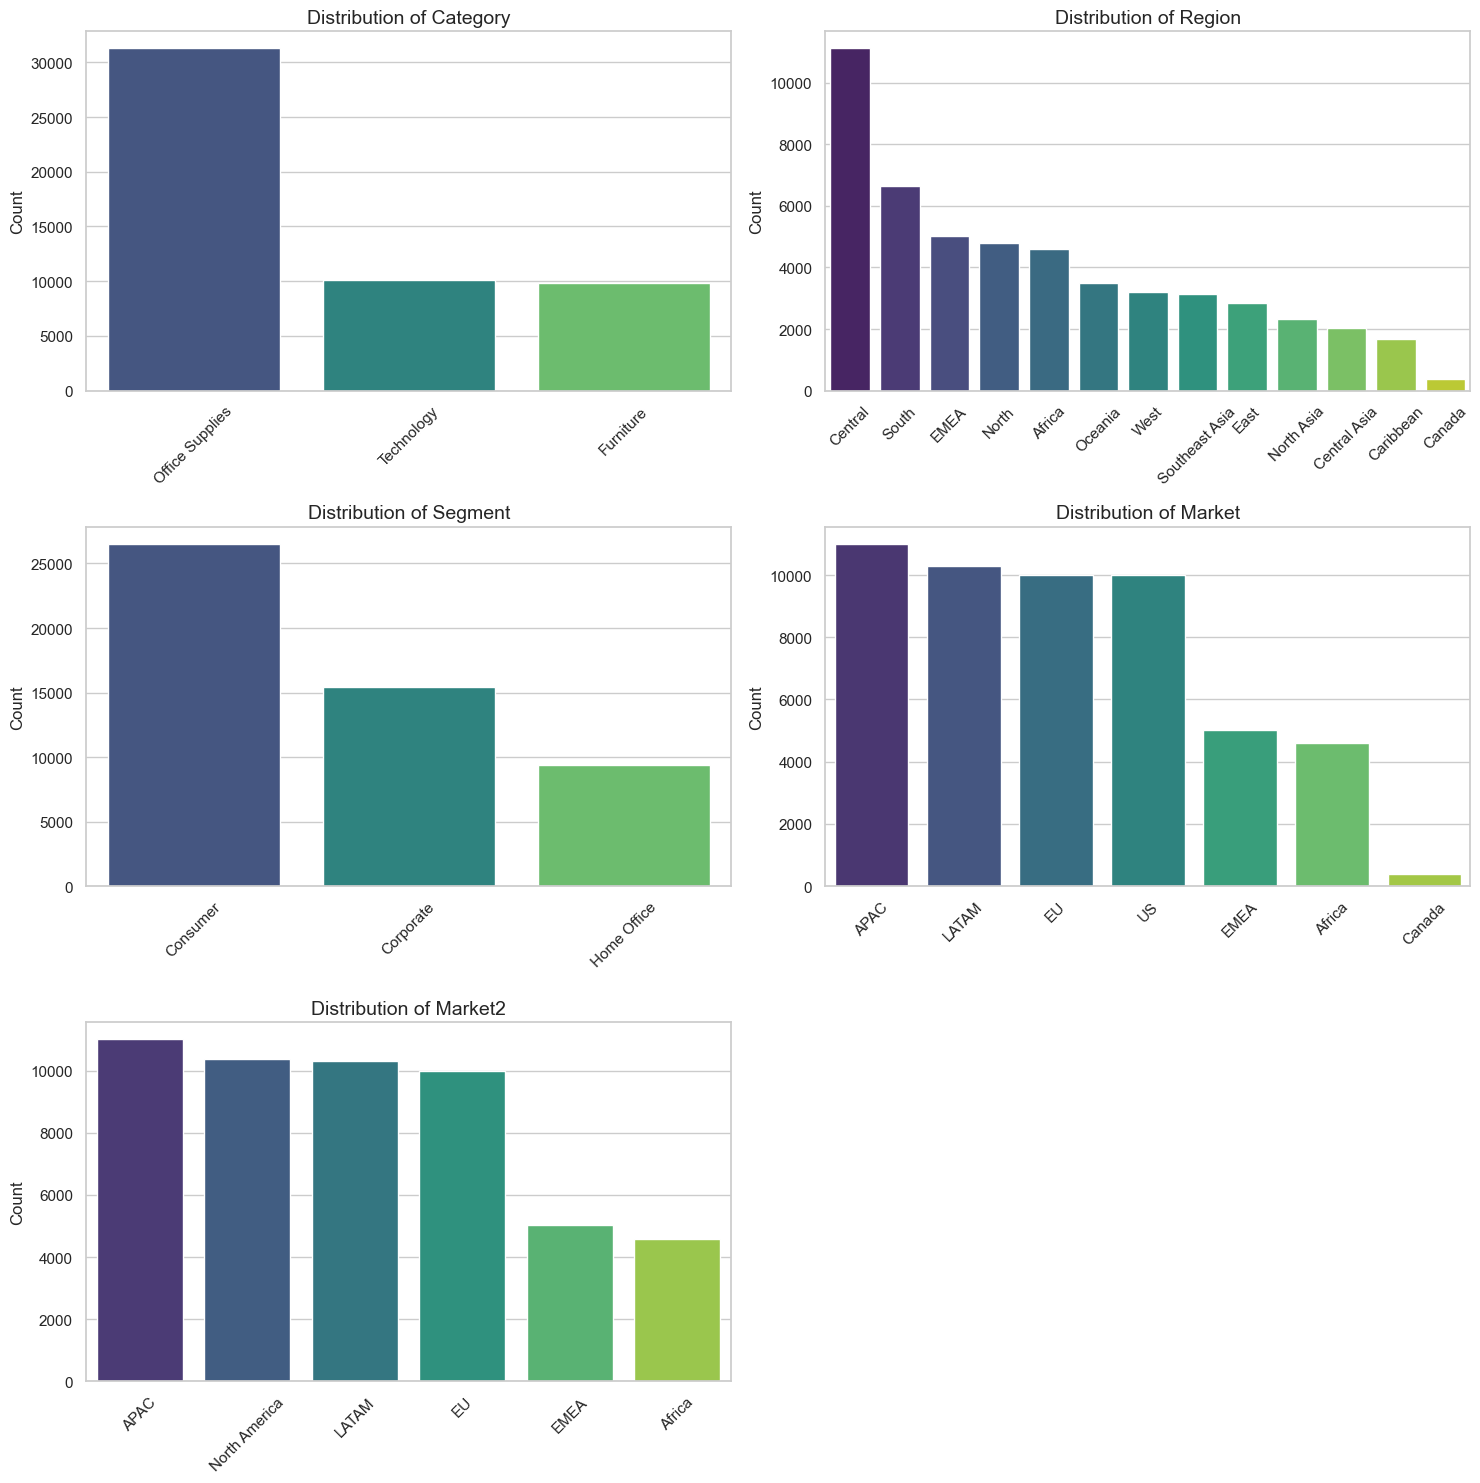

In [29]:


# # List of columns to visualize
# let_columns = ["Category", "Region", "Segment", "Market", "Market2"]

# Set the visual style
sns.set_theme(style="whitegrid")

# Create a figure with subplots (e.g., 3 rows, 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten() # Flatten the 2D array of axes for easy looping

for i, col in enumerate(let_columns):
    # Create the bar chart (count plot)
    # Sorting by count makes the chart much easier to read
    order = data[col].value_counts().index
    sns.countplot(data=data, x=col, ax=axes[i], order=order, palette="viridis")
    
    # Beautification
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    # Rotate labels if they are long
    axes[i].tick_params(axis='x', rotation=45)

# Remove the empty 6th subplot (since we only have 5 columns)
fig.delaxes(axes[5])

plt.tight_layout()
plt.savefig('distribution_charts.png')
    
    

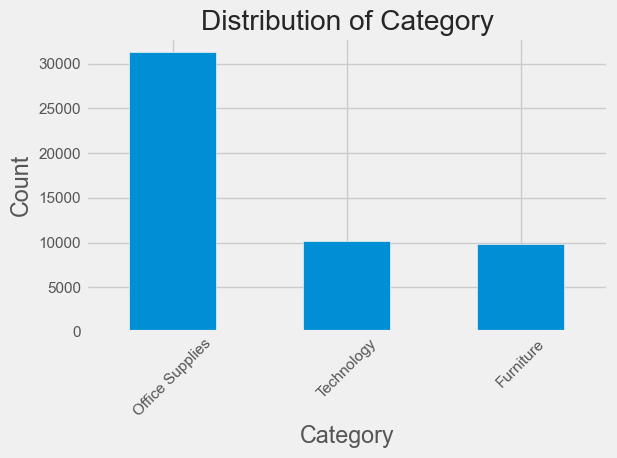

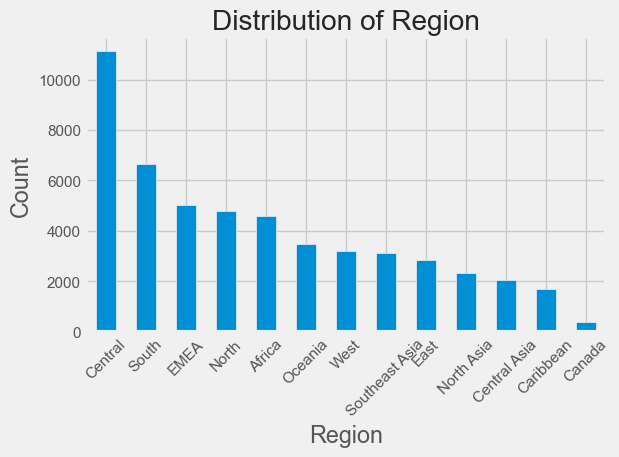

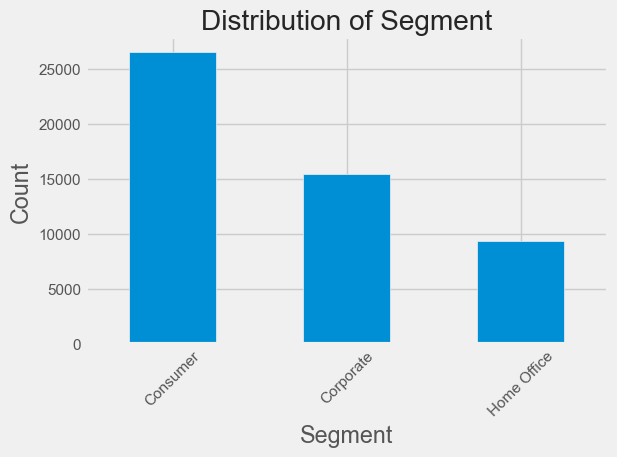

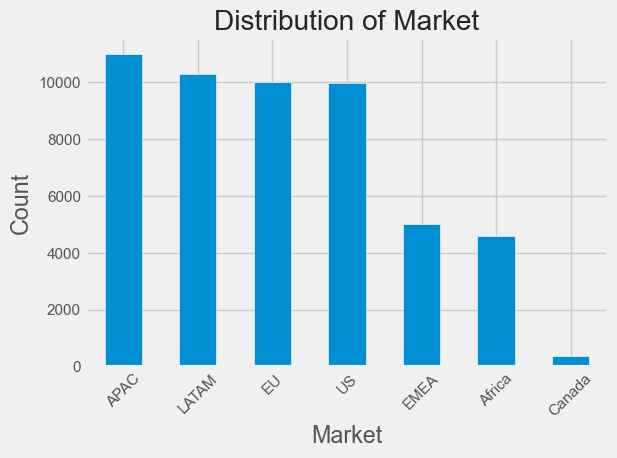

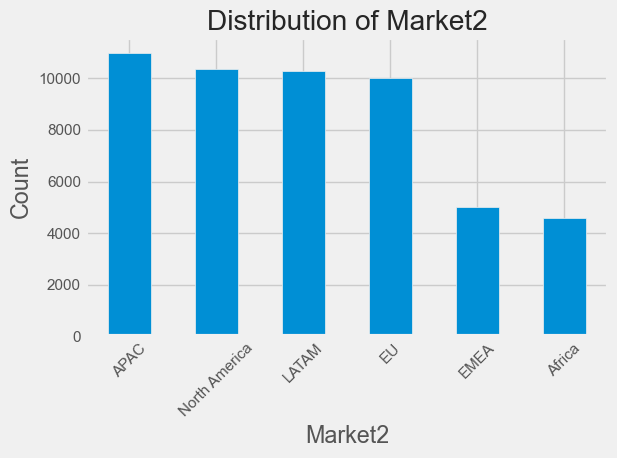

In [47]:
cat_columns=["Category", "Region", "Segment", "Market", "Market2"]
for col in cat_columns:
    
    counts=data[col].value_counts()

    plt.figure()
    counts.plot(kind='bar')
    
    
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

In [48]:
data.to_csv('cleaned_data.csv', index=False)